Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import env
import acquire
import prepare
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [125]:
df_titanic = acquire.get_titanic_data()
df_titanic = prepare.prep_titanic(df_titanic)
train, validate, test = prepare.split_data(df_titanic)

In [126]:
df_titanic.head()
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [127]:
train.isna().sum()

Unnamed: 0                  0
survived                    0
pclass                      0
age                        97
sibsp                       0
parch                       0
fare                        0
embark_town                 0
alone                       0
sex_male                    0
embark_town_Queenstown      0
embark_town_Southampton     0
dtype: int64

In [128]:
X_train = train.drop(columns = ['survived', 'age', 'embark_town'])

In [129]:
X_train.head()

,Unnamed: 0,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,1,0,0,40.1250,1,1,0,0
165,165,3,0,2,20.5250,0,1,0,1
50,50,3,4,1,39.6875,0,1,0,1
259,259,2,0,1,26.0000,0,0,0,1
306,306,1,0,0,110.8833,1,0,0,0


In [130]:
y_train = train.survived

X_validate = validate.drop(columns = ['survived', 'age', 'embark_town'])
y_validate = validate.survived

X_test = test.drop(columns = ['survived', 'age', 'embark_town'])
y_test = test.survived

In [131]:
X_train.isna().sum()

Unnamed: 0                 0
pclass                     0
sibsp                      0
parch                      0
fare                       0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [132]:
X_train.shape, X_validate.shape, X_test.shape

((498, 9), (214, 9), (179, 9))


1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.


In [133]:
y_train.value_counts()
#baseline prediction is 0, did not survive
baseline = 0 

In [134]:
baseline_0_count = (y_train == 0)
baseline_0_count.head()

583     True
165    False
50      True
259    False
306    False
Name: survived, dtype: bool

In [135]:
baseline_accuracy = round(baseline_0_count.mean(), 2)
baseline_accuracy

0.62

baseline accuracy is 0.62


2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [136]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   sibsp                    498 non-null    int64  
 3   parch                    498 non-null    int64  
 4   fare                     498 non-null    float64
 5   alone                    498 non-null    int64  
 6   sex_male                 498 non-null    uint8  
 7   embark_town_Queenstown   498 non-null    uint8  
 8   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 28.7 KB


In [137]:
dec_tree_1 = DecisionTreeClassifier(max_depth=4, random_state=123)

In [138]:
dec_tree_1 = dec_tree_1.fit(X_train, y_train)


3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.


In [139]:
y_pred = dec_tree_1.predict(X_train)

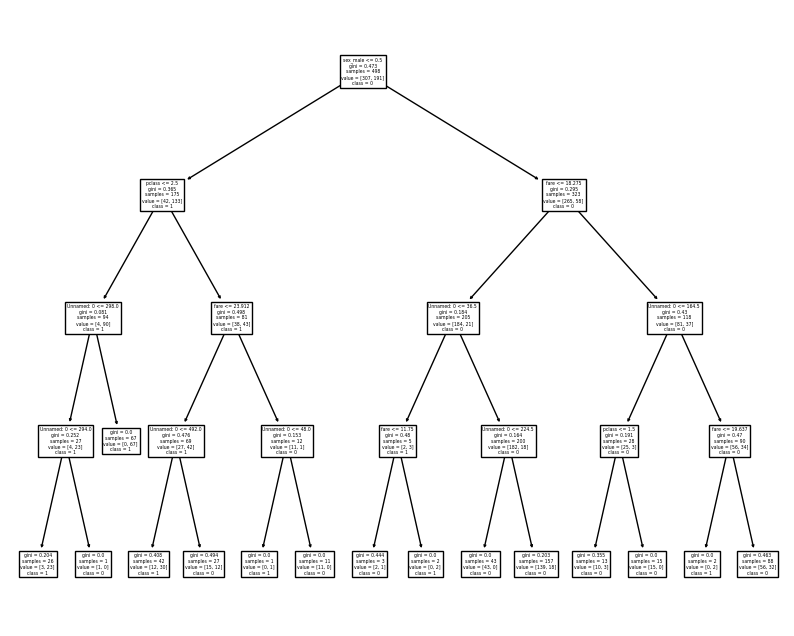

In [140]:
plt.figure(figsize=(10, 8))
plot_tree(dec_tree_1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

In [141]:
accuracy = dec_tree_1.score(X_train, y_train)
accuracy

0.8373493975903614

In [142]:
confusion_matrix(y_train, y_pred)

array([[292,  15],
       [ 66, 125]])

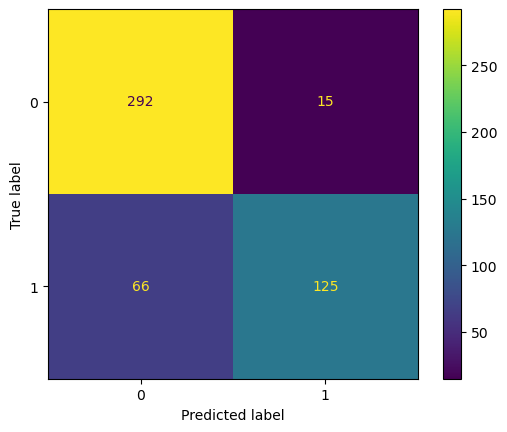

In [143]:
plot_confusion_matrix(dec_tree_1, X_train, y_train)

In [144]:
cr_dec_tree_1 = classification_report(y_train, y_pred)
cr_dec_tree_1

'              precision    recall  f1-score   support\n\n           0       0.82      0.95      0.88       307\n           1       0.89      0.65      0.76       191\n\n    accuracy                           0.84       498\n   macro avg       0.85      0.80      0.82       498\nweighted avg       0.85      0.84      0.83       498\n'


4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [145]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp 

(292, 15, 66, 125)

In [146]:
neg = tn + fp
pos = fn +tp 
accuracy = (tp + tn) / (neg + pos)
accuracy

0.8373493975903614

accuracy is 84%

In [147]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)

In [148]:
p_r = precision * recall
p_plus_r = precision + recall 

In [149]:
f1 = 2 * (p_r / p_plus_r)
f1

0.7552870090634441

In [150]:
print(f'Precision is: ', precision,'\n','Recall is: ', recall,  "\n" ,'F1 is: ',f1 )

Precision is:  0.8928571428571429 
 Recall is:  0.6544502617801047 
 F1 is:  0.7552870090634441


5. Run through steps 2-4 using a different max_depth value.


In [151]:
dec_tree_2 = DecisionTreeClassifier(max_depth=5, random_state=123)
dec_tree_2 = dec_tree_1.fit(X_train, y_train)

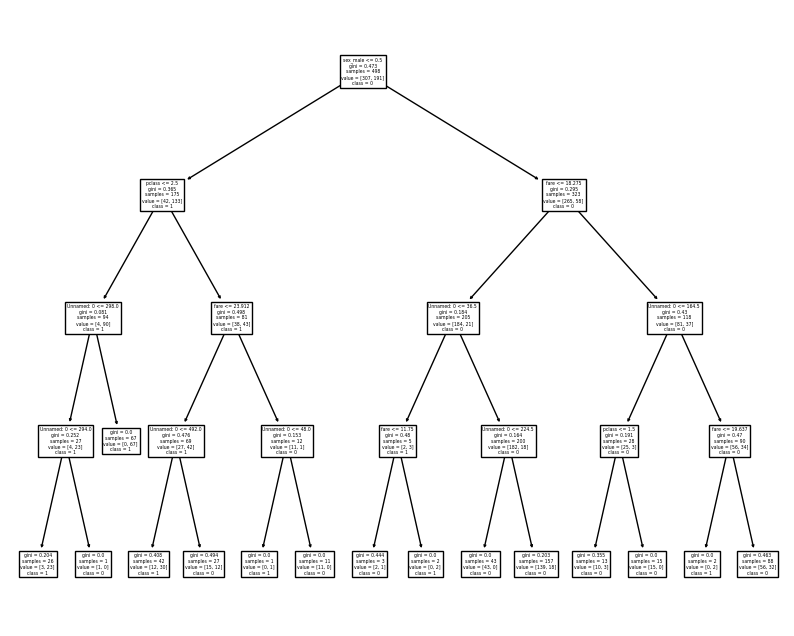

In [152]:
plt.figure(figsize=(10, 8))
plot_tree(dec_tree_2, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

In [153]:
accuracy = dec_tree_2.score(X_train, y_train)
accuracy

0.8373493975903614

In [154]:
confusion_matrix(y_train, y_pred)

array([[292,  15],
       [ 66, 125]])

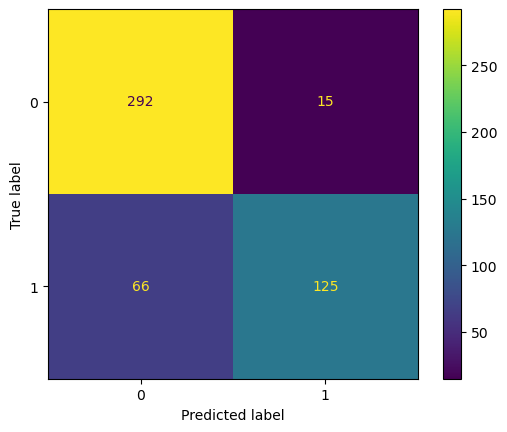

In [155]:
plot_confusion_matrix(dec_tree_2, X_train, y_train)

In [156]:
cr_dec_tree_2 = classification_report(y_train, y_pred)
cr_dec_tree_2

'              precision    recall  f1-score   support\n\n           0       0.82      0.95      0.88       307\n           1       0.89      0.65      0.76       191\n\n    accuracy                           0.84       498\n   macro avg       0.85      0.80      0.82       498\nweighted avg       0.85      0.84      0.83       498\n'

In [157]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_train, y_pred).ravel()
tn2, fp2, fn2, tp2 

(292, 15, 66, 125)

In [158]:
neg2 = tn + fp
pos2 = fn +tp 
accuracy2 = (tp + tn) / (neg + pos)
accuracy2

0.8373493975903614

accuracy is 84%

In [159]:
precision2 = tp / (tp + fp)
recall2 = tp / (tp + fn)
p_r2 = precision * recall
p_plus_r2 = precision + recall 
f12 = 2 * (p_r / p_plus_r)

print(f'Precision is: ', precision2,'\n','Recall is: ', precision2,  "\n" ,'F1 is: ',f12)

Precision is:  0.8928571428571429 
 Recall is:  0.8928571428571429 
 F1 is:  0.7552870090634441



6. Which model performs better on your in-sample data?


the second model with max depth 5


7. Which model performs best on your out-of-sample data, the validate set?


In [164]:
#Max Depth 5 on validate
dec_tree_1_val = DecisionTreeClassifier(max_depth=5, random_state=123)
dec_tree_1_val = dec_tree_1.fit(X_validate, y_validate)
accuracy_1_val = dec_tree_2.score(X_validate, y_validate)
y_pred_1_val = dec_tree_1.predict(X_validate)


In [165]:
confusion_matrix(y_validate, y_pred_1_val)


array([[117,  15],
       [ 23,  59]])

In [167]:
cr_dec_tree_1_val = classification_report(y_validate, y_pred_1_val)
tn_1_val, fp_1_val, fn_1_val, tp_1_val = confusion_matrix(y_validate, y_pred_1_val).ravel()
neg2 = tn_1_val + fp_1_val
pos2 = fn_1_val + tp_1_val
accuracy2 = (tp + tn) / (neg + pos)
precision2 = tp / (tp + fp)
recall2 = tp / (tp + fn)
p_r2 = precision * recall
p_plus_r2 = precision + recall 
f12 = 2 * (p_r / p_plus_r)

print(f'Precision is: ', precision2,'\n','Recall is: ', precision2,  "\n" ,'F1 is: ',f12)

Precision is:  0.8928571428571429 
 Recall is:  0.8928571428571429 
 F1 is:  0.7552870090634441


- - -

In [168]:
#Max Depth 4 on validate
dec_tree_2_val = DecisionTreeClassifier(max_depth=4, random_state=123)
dec_tree_2_val = dec_tree_1.fit(X_validate, y_validate)
accuracy_2_val = dec_tree_2.score(X_validate, y_validate)
y_pred_2_val = dec_tree_1.predict(X_validate)
confusion_matrix(y_validate, y_pred_2_val)
cr_dec_tree_2_val = classification_report(y_validate, y_pred_2_val)
tn_2_val, fp_2_val, fn_2_val, tp_2_val = confusion_matrix(y_validate, y_pred_2_val).ravel()
neg2 = tn_2_val + fp_2_val
pos2 = fn_2_val + tp_2_val
accuracy2 = (tp + tn) / (neg + pos)
precision2 = tp / (tp + fp)
recall2 = tp / (tp + fn)
p_r2 = precision * recall
p_plus_r2 = precision + recall 
f12 = 2 * (p_r / p_plus_r)

print(f'Precision is: ', precision2,'\n','Recall is: ', precision2,  "\n" ,'F1 is: ',f12)

Precision is:  0.8928571428571429 
 Recall is:  0.8928571428571429 
 F1 is:  0.7552870090634441


They both perfom exactly the same.  I think I went wrong someone with variable names.  Should make a function to do this severl times with arguments given for max depth and which dataframe to use.


#### Bonus
1. Work through these same exercises using the Telco dataset.

2. Experiment with this model on other datasets with a higher number of output classes.